In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

In [2]:
int_results = pd.read_csv('data/fifa/international_results.csv')
int_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
int_results['home_win'] = (int_results.home_score - int_results.away_score > 0).astype(int)
int_results.loc[int_results['home_score'] == int_results['away_score'], 'home_win'] = 2

In [4]:
int_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,2
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,2
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1


In [59]:
winners = []
for i, winner in enumerate(int_results.home_win):
    if winner == 1:
        winners.append(int_results.loc[i, 'home_team'])
    elif winner == 0:
        winners.append(int_results.loc[i, 'away_team'])
    else:
        winners.append('Tie')
int_results['Winner'] = winners
int_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,Winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,2,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,2,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1,Scotland


In [267]:
int_results_after2014 = int_results[(int_results['date'] > '2014-01-01') & (int_results['date'] < '2018-06-14')]
int_results_after2014['date'] = pd.to_datetime(int_results_after2014['date'])
int_results_after2014 = int_results_after2014.reset_index(drop = True)
int_results_after2014.head()

/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,Winner
0,2014-01-04,Bahrain,Jordan,0,1,WAFF Championship,Doha,Qatar,True,0,Jordan
1,2014-01-04,Namibia,Ghana,0,1,Friendly,Windhoek,Namibia,False,0,Ghana
2,2014-01-04,Nigeria,Ethiopia,2,1,Friendly,Abuja,Nigeria,False,1,Nigeria
3,2014-01-04,Qatar,Kuwait,3,0,WAFF Championship,Doha,Qatar,False,1,Qatar
4,2014-01-07,Bahrain,Kuwait,0,0,WAFF Championship,Doha,Qatar,True,2,Tie


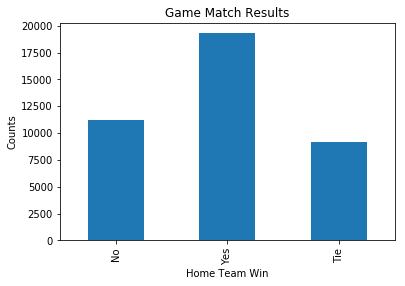

In [119]:
int_results.groupby(['home_win']).count()['home_score'].plot(kind='bar')
plt.ylabel('Counts')
locs, labels = plt.xticks()
plt.xticks(locs, ('No', 'Yes', 'Tie'))
plt.title('Game Match Results')
plt.xlabel('Home Team Win')
plt.savefig('figs/gamematchresults.png');

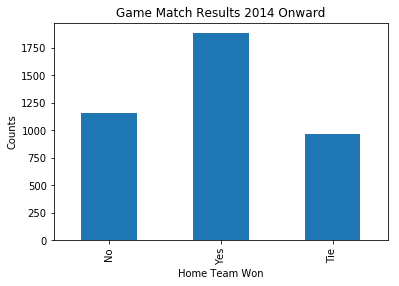

In [120]:
int_results_after2014.groupby(['home_win']).count()['home_score'].plot(kind='bar')
plt.ylabel('Counts')
locs, labels = plt.xticks()
plt.xticks(locs, ('No', 'Yes', 'Tie'))
plt.title('Game Match Results 2014 Onward')
plt.xlabel('Home Team Won');
plt.savefig('figs/gamematchresults2014.png');

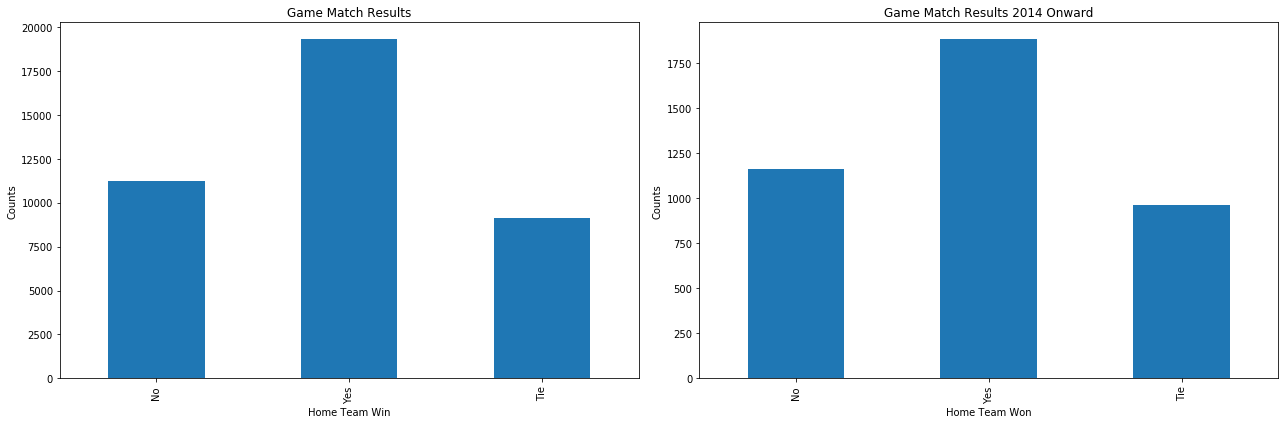

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))
int_results.groupby(['home_win']).count()['home_score'].plot(kind='bar', ax = ax1)
int_results_after2014.groupby(['home_win']).count()['home_score'].plot(kind='bar', ax = ax2)
plt.sca(ax1)
plt.ylabel('Counts')
locs, labels = plt.xticks()
plt.xticks(locs, ('No', 'Yes', 'Tie'))
plt.title('Game Match Results')
plt.xlabel('Home Team Win')
plt.sca(ax2)
plt.ylabel('Counts')
locs, labels = plt.xticks()
plt.xticks(locs, ('No', 'Yes', 'Tie'))
plt.title('Game Match Results 2014 Onward')
plt.xlabel('Home Team Won');

plt.tight_layout()
plt.savefig('figs/gamematchresults.png');

In [185]:
win_count = int_results_after2014.groupby('Winner')['home_team'].count().reset_index()
win_count.columns = ['Team', 'Number of Wins']
win_count = win_count[win_count['Team'] != 'Tie']


In [186]:
worldcup_teams =['Egypt', 'Russia', 'Saudi Arabia', 'Uruguay', 'Iran', 'Morocco',
       'Portugal', 'Spain', 'Australia', 'Denmark', 'France', 'Peru',
       'Argentina', 'Croatia', 'Iceland', 'Nigeria', 'Brazil',
       'Costa Rica', 'Serbia', 'Switzerland', 'Germany', 'Mexico',
       'Korea Republic', 'Sweden', 'Belgium', 'England', 'Panama', 'Tunisia',
       'Colombia', 'Japan', 'Poland', 'Senegal']

worldcup_team_win_count = win_count[win_count['Team'].isin(worldcup_teams)]

In [187]:
games = []
for team in worldcup_team_win_count.Team:
    games.append(len(int_results_after2014[int_results_after2014['away_team'] == team]) +\
                len(int_results_after2014[int_results_after2014['home_team'] == team]))
worldcup_team_win_count['Number of Games'] = games
worldcup_team_win_count['Win Rate'] = worldcup_team_win_count['Number of Wins'] /\
                            worldcup_team_win_count['Number of Games']
worldcup_team_win_count = worldcup_team_win_count.sort_values('Win Rate', ascending = False)
worldcup_team_win_count

/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Team,Number of Wins,Number of Games,Win Rate
22,Belgium,37,52,0.711538
31,Brazil,37,53,0.698113
76,France,39,58,0.672414
204,Spain,33,50,0.660000
214,Switzerland,29,46,0.630435
179,Portugal,37,59,0.627119
81,Germany,38,61,0.622951
103,Iran,32,52,0.615385
67,England,31,51,0.607843
190,Senegal,29,50,0.580000


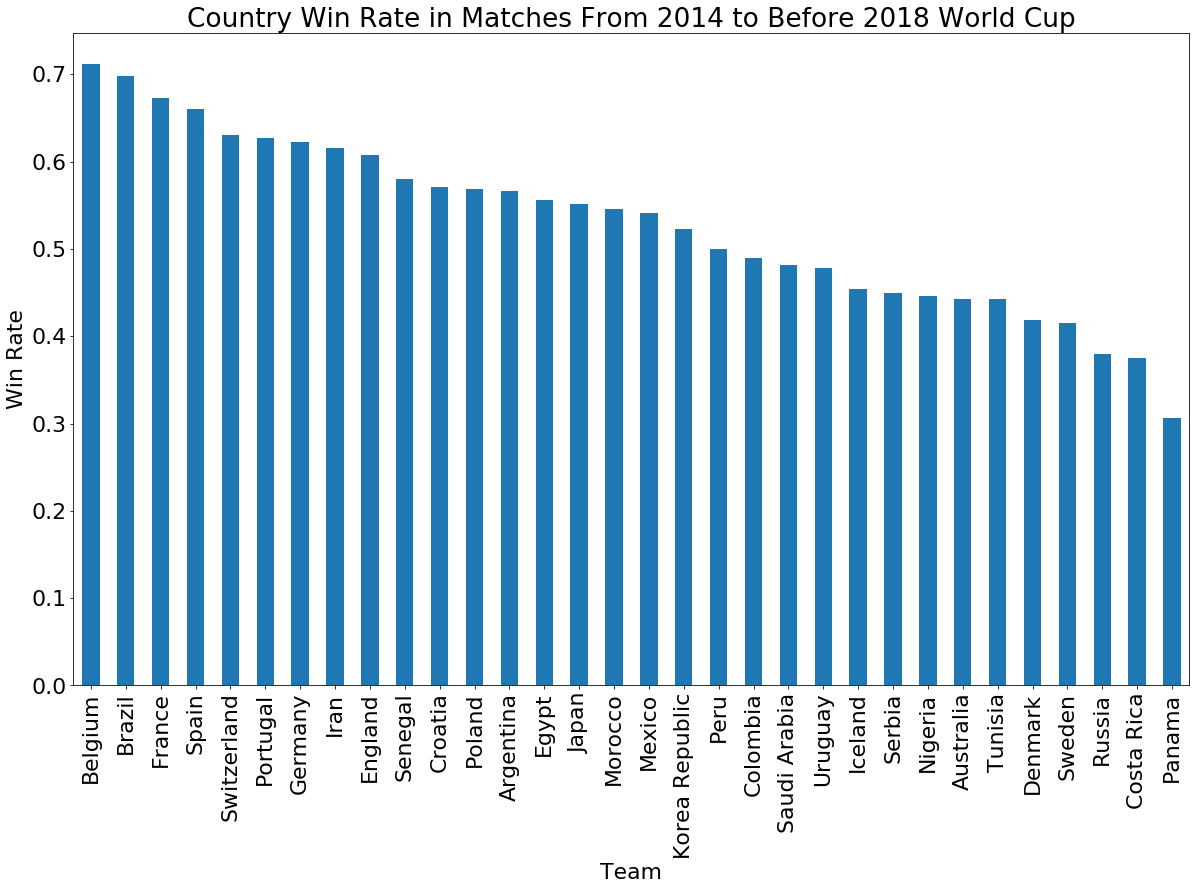

In [193]:
worldcup_team_win_count.plot.bar('Team', 'Win Rate', figsize = (20, 12))
plt.ylabel('Win Rate')
plt.title('Country Win Rate in Matches From 2014 to Before 2018 World Cup', )
plt.xticks(rotation=90)
plt.legend().set_visible(False)
plt.savefig('figs/winrate.png', bbox_inches='tight');

In [125]:
worldcup_win_count

,Winner,Number of Wins
10,Argentina,30
14,Australia,23
22,Belgium,37
31,Brazil,37
46,Colombia,24
51,Costa Rica,21
53,Croatia,28
58,Denmark,18
64,Egypt,25
67,England,31


In [228]:
#https://gitlab.com/djh_or/2018-world-cup-stats/blob/master/world_cup_2018_stats.csv
world_cup_results = pd.read_csv("data/world_cup_2018_stats.csv")
world_cup_results.head()

,Game,Group,Team,Opponent,Home/Away,Score,WDL,Pens?,Goals For,Goals Against,...,Passes Completed,Distance Covered km,Balls recovered,Tackles,Blocks,Clearances,Yellow cards,Red Cards,Second Yellow Card leading to Red Card,Fouls Committed
0,1,A,Russia,Saudi Arabia,home,5-0,W,NaN,5,0,...,240,118,53,9,3,19,1,0,0,22
1,1,A,Saudi Arabia,Russia,away,5-0,L,NaN,0,5,...,442,105,48,16,3,31,1,0,0,10
2,2,A,Egypt,Uruguay,home,0-1,L,NaN,0,1,...,308,112,57,12,4,32,2,0,0,12
3,2,A,Uruguay,Egypt,away,0-1,W,NaN,1,0,...,508,111,54,8,2,22,0,0,0,6
4,3,B,Morocco,IR Iran,home,0-1,L,NaN,0,1,...,371,101,38,9,1,16,1,0,0,22


In [229]:
(set(worldcup_teams) - set(world_cup_results['Team'].unique())).union(\
    (set(world_cup_results['Team'].unique()) - set(worldcup_teams)))

{'IR Iran', 'Iran'}

In [230]:
world_cup_results['Team'] = world_cup_results['Team'].replace('IR Iran', 'Iran')

In [231]:
(set(worldcup_teams) - set(world_cup_results['Team'].unique())).union(\
    (set(world_cup_results['Team'].unique()) - set(worldcup_teams)))

set()

In [375]:
#https://www.kaggle.com/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
rankings = pd.read_csv('data/fifa_ranking.csv')
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
rankings_after2013 = rankings[rankings['rank_date'] > pd.to_datetime('2013-01-01')]

In [376]:
def get_latest_ranking_date(match_date, rankings_dates):
    return rankings_dates[match_date.to_datetime64() >  rankings_dates].max()

In [377]:
rankings_dates_after2013 = rankings_after2013.rank_date.unique()
int_results_after2014['latest_ranking_date'] = int_results_after2014['date'].apply(\
                                        get_latest_ranking_date, args = [rankings_dates_after2013])


In [378]:
int_results_after2014

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,Winner,latest_ranking,latest_ranking_date
0,2014-01-04,Bahrain,Jordan,0,1,WAFF Championship,Doha,Qatar,True,0,Jordan,2013-12-19,2013-12-19
1,2014-01-04,Namibia,Ghana,0,1,Friendly,Windhoek,Namibia,False,0,Ghana,2013-12-19,2013-12-19
2,2014-01-04,Nigeria,Ethiopia,2,1,Friendly,Abuja,Nigeria,False,1,Nigeria,2013-12-19,2013-12-19
3,2014-01-04,Qatar,Kuwait,3,0,WAFF Championship,Doha,Qatar,False,1,Qatar,2013-12-19,2013-12-19
4,2014-01-07,Bahrain,Kuwait,0,0,WAFF Championship,Doha,Qatar,True,2,Tie,2013-12-19,2013-12-19
5,2014-01-07,Qatar,Jordan,2,0,WAFF Championship,Doha,Qatar,False,1,Qatar,2013-12-19,2013-12-19
6,2014-01-07,Zimbabwe,Gabon,2,0,Friendly,Johannesburg,South Africa,True,1,Zimbabwe,2013-12-19,2013-12-19
7,2014-01-11,Mali,Nigeria,2,1,African Nations Championship,Cape Town,South Africa,True,1,Mali,2013-12-19,2013-12-19
8,2014-01-11,South Africa,Mozambique,3,1,African Nations Championship,Cape Town,South Africa,False,1,South Africa,2013-12-19,2013-12-19
9,2014-01-12,Uganda,Burkina Faso,2,1,African Nations Championship,Cape Town,South Africa,True,1,Uganda,2013-12-19,2013-12-19


In [379]:
set(int_results_after2014.Winner.unique()) - set(rankings_after2013.country_full)

{'Abkhazia',
 'Alderney',
 'Arameans Suryoye',
 'Artsakh',
 'Barawa',
 'Bonaire',
 'Bosnia-Herzegovina',
 'Brunei',
 'Burma',
 'Cape Verde',
 'Cascadia',
 'China',
 'County of Nice',
 'East Timor',
 'Ellan Vannin',
 'Falkland Islands',
 'Felvidék',
 'French Guyana',
 'Gotland',
 'Greenland',
 'Guadeloupe',
 'Guersney',
 'Hitra',
 'Iran',
 'Iraqi Kurdistan',
 'Ireland',
 'Isle of Man',
 'Isle of Wight',
 'Ivory Coast',
 'Jersey',
 'Kabylia',
 'Kyrgyzstan',
 'Kárpátalja',
 'Macedonia',
 'Martinique',
 'Matabeleland',
 'Menorca',
 'Northern Cyprus',
 'Northern Mariana Islands',
 'Occitania',
 'Orkney',
 'Padania',
 'Panjab',
 'Romani people',
 'Saare County',
 'Shetland',
 'Sint Maarten',
 'Somaliland',
 'South Ossetia',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Martin',
 'St. Vincent and the Grenadines',
 'Székely Land',
 'Sápmi',
 'São Tomé and Príncipe',
 'Taiwan',
 'Tamil Eelam',
 'Tie',
 'Tuvalu',
 'United Koreans in Japan',
 'Virgin Islands',
 'Western Armenia',
 'Western Isles',


In [380]:
set(rankings_after2013.country_full) - set(int_results_after2014.Winner.unique())

{'Anguilla',
 'Bahamas',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cape Verde Islands',
 'Cayman Islands',
 'China PR',
 'Chinese Taipei',
 "Côte d'Ivoire",
 'Eritrea',
 'FYR Macedonia',
 'IR Iran',
 'Kyrgyz Republic',
 'Myanmar',
 'Republic of Ireland',
 'San Marino',
 'Somalia',
 'St Kitts and Nevis',
 'St Lucia',
 'St Vincent and the Grenadines',
 'São Tomé e Príncipe',
 'Timor-Leste',
 'Tonga',
 'US Virgin Islands'}

In [381]:
country_mapping = {
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
    'Cape Verde Islands': 'Cape Verde',
    #We have no political intentions with this assignment.
    'China PR': 'China',
    'Chinese Taipei': 'Taiwan',
    "Côte d'Ivoire'": 'Ivory Coast',
    'FYR Macedonia': 'Macedonia',
    'IR Iran' : 'Iran',
    'Kyrgyz Republic' : 'Kyrgyzstan',
    'Myanmar': 'Burma',
    'Republic of Ireland': 'Ireland',
    'St Kitts and Nevis': 'St. Kitts and Nevis',
    'St Lucia': 'St. Lucia',
    'St Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'São Tomé e Príncipe': 'São Tomé and Príncipe',
    'Timor-Leste': 'East Timor',
    #no clue which virgin islands
    'US Virgin Islands': 'Virgin Islands'
}


In [382]:
def map_countries(rankings_country, country_mapping):
    if rankings_country in country_mapping.keys():
        return country_mapping[rankings_country]
    return rankings_country

In [383]:
rankings_after2013['country_mapped'] = rankings_after2013['country_full'].apply(map_countries,\
                                                                                     args = [country_mapping]) 

/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [384]:
set(rankings_after2013.country_mapped) - set(int_results_after2014.Winner.unique())

{'Anguilla',
 'Bahamas',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cayman Islands',
 "Côte d'Ivoire",
 'Eritrea',
 'San Marino',
 'Somalia',
 'Tonga'}

In [385]:
int_results_after2014.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_win', 'Winner',
       'latest_ranking', 'latest_ranking_date'],
      dtype='object')

In [390]:
home_rankings_after2013 = rankings_after2013.copy()
home_rankings_after2013.columns = ['home_' + column for column in home_rankings_after2013.columns]
results_df = int_results_after2014.merge(home_rankings_after2013, left_on = ['home_team', 'latest_ranking_date'],\
                            right_on = ['home_country_mapped', 'home_rank_date'])
away_rankings_after2013 = rankings_after2013.copy()
away_rankings_after2013.columns = ['away_' + column for column in away_rankings_after2013.columns]
results_df = results_df.merge(away_rankings_after2013, left_on = ['away_team', 'latest_ranking_date'],\
                            right_on = ['away_country_mapped', 'away_rank_date'])


In [391]:
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,away_confederation,away_rank_date,away_country_mapped
3624,2018-06-09,Tunisia,Spain,0,1,Friendly,Krasnodar,Russia,True,0,...,537.05,611.48,305.74,646.40,193.92,443.99,88.80,UEFA,2018-06-07,Spain
3625,2018-06-09,France,USA,1,1,Friendly,Lyon,France,False,2,...,473.00,461.32,230.66,349.62,104.89,320.72,64.14,CONCACAF,2018-06-07,USA
3626,2018-06-10,Austria,Brazil,0,3,Friendly,Vienna,Austria,False,0,...,558.95,1082.36,541.18,560.21,168.06,811.88,162.38,CONMEBOL,2018-06-07,Brazil
3627,2018-06-11,Belgium,Costa Rica,4,1,Friendly,Brussels,Belgium,False,1,...,410.90,480.58,240.29,332.44,99.73,665.55,133.11,CONCACAF,2018-06-07,Costa Rica
3628,2018-06-12,Japan,Paraguay,4,2,Friendly,Innsbruck,Austria,True,1,...,410.36,390.68,195.34,487.30,146.19,106.43,21.29,CONMEBOL,2018-06-07,Paraguay


In [392]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_win', 'Winner',
       'latest_ranking', 'latest_ranking_date', 'home_rank',
       'home_country_full', 'home_country_abrv', 'home_total_points',
       'home_previous_points', 'home_rank_change', 'home_cur_year_avg',
       'home_cur_year_avg_weighted', 'home_last_year_avg',
       'home_last_year_avg_weighted', 'home_two_year_ago_avg',
       'home_two_year_ago_weighted', 'home_three_year_ago_avg',
       'home_three_year_ago_weighted', 'home_confederation', 'home_rank_date',
       'home_country_mapped', 'away_rank', 'away_country_full',
       'away_country_abrv', 'away_total_points', 'away_previous_points',
       'away_rank_change', 'away_cur_year_avg', 'away_cur_year_avg_weighted',
       'away_last_year_avg', 'away_last_year_avg_weighted',
       'away_two_year_ago_avg', 'away_two_year_ago_weighted',
       'away_three_year_ago_avg', 'away_three_year_ag

In [546]:
final_results_df = results_df[['home_win', 'home_rank', 'away_rank',\
            'home_cur_year_avg_weighted', 'home_total_points','away_cur_year_avg_weighted',
            'away_total_points', 'home_last_year_avg', 'away_last_year_avg', 'home_two_year_ago_avg',
            'away_two_year_ago_avg', 'neutral',  'home_confederation']]
# final_results_df['rank_diff'] = final_results_df['home_rank'] - final_results_df['away_rank']

In [547]:
tournament_dummies = pd.get_dummies(final_results_df['home_confederation'], drop_first = True)
final_results_df[tournament_dummies.columns] = tournament_dummies
final_results_df = final_results_df.drop(['home_confederation'], axis = 1)

/Users/blin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [548]:
final_results_df.head()

,home_win,home_rank,away_rank,home_cur_year_avg_weighted,home_total_points,away_cur_year_avg_weighted,away_total_points,home_last_year_avg,away_last_year_avg,home_two_year_ago_avg,away_two_year_ago_avg,neutral,CAF,CONCACAF,CONMEBOL,OFC,UEFA
0,0,110,65,174.70,291.66,343.17,535.63,102.82,152.19,163.78,266.37,True,0,0,0,0,0
1,1,103,65,140.16,324.85,343.17,535.63,183.57,152.19,225.79,266.37,False,0,0,0,0,0
2,2,110,105,174.70,291.66,172.78,314.94,102.82,95.79,163.78,187.73,True,0,0,0,0,0
3,1,103,105,140.16,324.85,172.78,314.94,183.57,95.79,225.79,187.73,False,0,0,0,0,0
4,0,125,24,97.78,237.21,453.96,848.68,149.59,398.69,192.78,288.00,False,1,0,0,0,0


In [549]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [550]:
y_train = final_results_df['home_win']
X_train = final_results_df.drop(['home_win',], axis = 1)

In [551]:
lr_model = LogisticRegression().fit(X_train, y_train)

In [552]:
lr_model.score(X_train, y_train)

0.5682006062276109

In [553]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [554]:
lda_model.score(X_train, y_train)

0.5665472581978507

In [555]:
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

In [556]:
qda_model.score(X_train, y_train)

0.5569027280242491

In [557]:
rf_model = RandomForestClassifier(min_samples_leaf = 20).fit(X_train, y_train)

In [558]:
rf_model.score(X_train, y_train)

0.637641223477542

In [559]:
len(y_train)

3629

In [560]:
from sklearn.metrics import accuracy_score

accuracy_score(np.ones(3629), y_train)

0.474786442546156